cluster #1, pts num = 63, 
pts = [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 25, 26, 27, 29, 30, 34, 36, 38, 39, 41, 43, 44, 47, 50, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 67, 68, 71, 72, 73, 74, 77, 78, 80, 81, 82, 85, 86, 87, 90, 92, 95, 98, 99]

cluster #2, pts num = 3, 
pts = [9, 52, 93]

cluster #3, pts num = 10, 
pts = [16, 24, 28, 33, 48, 65, 79, 83, 84, 88]

cluster #4, pts num = 3, 
pts = [31, 35, 51]

cluster #5, pts num = 9, 
pts = [32, 37, 40, 42, 45, 55, 69, 91, 96]

noise, pts num = 12, 
noise = {64, 97, 66, 6, 70, 75, 76, 46, 49, 22, 89, 94}


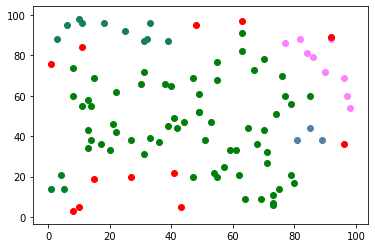

In [134]:
import matplotlib.pyplot as plt 
import numpy as np 
from enum import Enum 


def dist(x1, y1, x2, y2): 
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

def dbscan(x, y, eps, minPts):
    # Номер кластера
    C = 0
    for i in range(len(x)):
        if not i in visited:
            visited.add(i)
            # Находим соседние точки
            nghbPts = check_nghbs(x, y, i, eps)
            if len(nghbPts) < minPts:
                noise.add(i)
            else:
                # У этой точки ЗЕЛЕНЫЙ флаг
                # Добавляем эту точку в новый кластер, обходим соседей, 
                # и если можно их тоже добавляем в кластер
                C += 1
                update_cluster(i, nghbPts, C, eps, minPts)
                
def update_cluster(i, nghbPts, C, eps, minPts):
    if C not in clusters.keys():
        clusters[C] = []
    clusters[C].append(i)
    for pt in nghbPts:
        if not pt in visited:
            visited.add(pt)
            new_nghbPts = check_nghbs(x, y, pt, eps)
            if len(new_nghbPts) >= minPts:
                # Эта точка тоже ЗЕЛЕНАЯ, она потом добавится в кластер,
                # т.к. есть в списке new_nghbPts и будет в обходе
                nghbPts.extend(new_nghbPts)
            else:
                noise.add(pt)
        else:
            # ЖЕЛТЫЙ флаг, если точка была чьей-то краевой
            member_of_cluster = False
            for k, v in clusters.items():
                if pt in v:
                    member_of_cluster = True
            if not member_of_cluster:
                clusters[C].append(pt)
                noise.discard(pt)

def check_nghbs(x, y, i, eps):
    pts = []
    for p in range(len(x)):
        if dist(x[i], y[i], x[p], y[p]) <= eps:
            pts.append(p)
    return pts

n = 100 
eps, minPts = 10, 3 
x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)
 
clusters = {}
visited = set()
noise = set()

dbscan(x, y, eps, minPts)

clusters_cnt = len(clusters.keys())
for k, v in clusters.items():
    clr = k/clusters_cnt
    print(f'cluster #{k}, pts num = {len(v)}, \npts = {sorted(v)}\n')
    for i in v:
        plt.scatter(x[i], y[i], color= (clr**5, 0.5, clr **2))
print(f'noise, pts num = {len(noise)}, \nnoise = {noise}')
for i in noise:
    plt.scatter(x[i], y[i], c='r')
plt.show()
